In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import numpy as np

In [10]:
nb_path = pathlib.Path().resolve()
data_path = nb_path / 'Data' 

In [11]:
tree_1995_csv = data_path / '1995_Street_Tree_Census.csv'
tree_2005_csv = data_path / '2005_Street_Tree_Census.csv'
tree_2015_csv = data_path /'2015_Street_Tree_Census.csv'

In [12]:
tree_1995 = pd.read_csv(tree_1995_csv,usecols=['Diameter','Borough','Spc_Common'])
tree_2005 = pd.read_csv(tree_2005_csv,usecols=['tree_dbh','spc_common','boroname'],dtype={'tree_dbh':int,'spc_common':str,'boroname':str})
tree_2015 = pd.read_csv(tree_2015_csv,usecols=['tree_dbh','spc_common','borough'])

In [13]:
tree_2005.loc[tree_2005['boroname'] == '5','boroname'] = 'Staten Island'   # change boroname from '5' to 'Staten Island' in 2005 dataframe

### How many trees in each borough in 2015, 2005, and 1995?

In [14]:
grouped_1995 = tree_1995.groupby('Borough')    # group each dataframe by borough name
grouped_2005 = tree_2005.groupby('boroname')
grouped_2015 = tree_2015.groupby('borough')

In [15]:
print('\t1995 Tree Count')                      # print number of trees in each group
print(grouped_1995['Spc_Common'].count())

print('\n\t2005 Tree Count')
print(grouped_2005['spc_common'].count())

print('\n\t2015 Tree Count')
print(grouped_2015['spc_common'].count())

	1995 Tree Count
Borough
Bronx             48487
Brooklyn         117101
Manhattan         47215
Queens           227552
Staten Island     76634
Name: Spc_Common, dtype: int64

	2005 Tree Count
boroname
Bronx             59925
Brooklyn         142852
Manhattan         49886
Queens           240008
Staten Island     99701
Name: spc_common, dtype: int64

	2015 Tree Count
borough
Bronx             80584
Brooklyn         169744
Manhattan         62428
Queens           237970
Staten Island    101443
Name: spc_common, dtype: int64


### How many species in Manhattan?

In [16]:
m_1995 = grouped_1995.get_group('Manhattan')     # select only Manhattan from each dataframe
m_2005 = grouped_2005.get_group('Manhattan')
m_2015 = grouped_2015.get_group('Manhattan')

In [17]:
print('Number of Tree Species in Manhattan:')    # find number of unique species in each year
print('1995:',m_1995['Spc_Common'].nunique())
print('2005:',m_2005['spc_common'].nunique())
print('2015:',m_2015['spc_common'].nunique())

Number of Tree Species in Manhattan:
1995: 85
2005: 91
2015: 128


### How many trees of each species in Manhattan?

In [18]:
species_counts = {'1995':m_1995['Spc_Common'].value_counts(),       # make a dictionary with value counts of the species column of each dataframe
                  '2005': m_2005['spc_common'].value_counts(),
                  '2015':m_2015['spc_common'].value_counts()}


species_count_df = pd.DataFrame(species_counts)                    # create dataframe showing tree counts for each species
species_count_df.head(20)                                          # show first 20 rows of species count dataframe

,1995,2005,2015
'Schubert' chokecherry,NaN,NaN,163.0
"ALDER, EUROPEAN",13.0,NaN,NaN
AMUR CORKTREE,1.0,NaN,NaN
APPLE,275.0,31.0,NaN
"ARBORVITAE, AMERICAN",1.0,NaN,NaN
"ARBORVITAE, EASTERN",NaN,1.0,NaN
"ARBORVITAE, WESTERN",2.0,NaN,NaN
"ASH, FLOWERING",7.0,NaN,NaN
"ASH, GREEN",1213.0,912.0,NaN
"ASH, OTHER",NaN,6.0,NaN


### Bar and Pie Charts for Total Tree Counts in Each Borough

In [21]:
counts_1995 = grouped_1995['Spc_Common'].count()      # create objects for tree counts by borough for each year
counts_2005 = grouped_2005['spc_common'].count()
counts_2015 = grouped_2015['spc_common'].count()

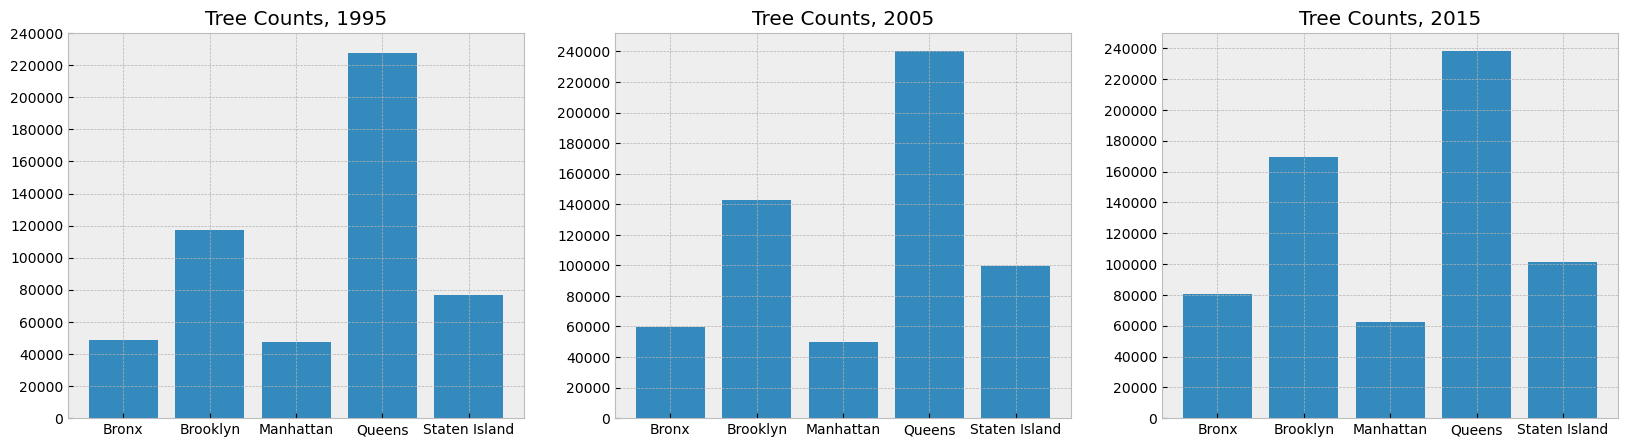

In [23]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))   # set up three axes
plt.style.use('bmh')

ax1.bar(counts_1995.index,counts_1995)                   # plot 1995 data
ax1.set_title('Tree Counts, 1995')
ax1.yaxis.set_ticks(np.arange(0,250000,20000))


ax2.bar(counts_2005.index,counts_2005)                 # 2005 data
ax2.set_title('Tree Counts, 2005')
ax2.yaxis.set_ticks(np.arange(0,250000,20000))

ax3.bar(counts_2015.index,counts_2015)                 # 2015 data
ax3.set_title('Tree Counts, 2015')
ax3.yaxis.set_ticks(np.arange(0,250000,20000))

plt.savefig(nb_path/ 'images' / 'treecounts.png')
plt.show()

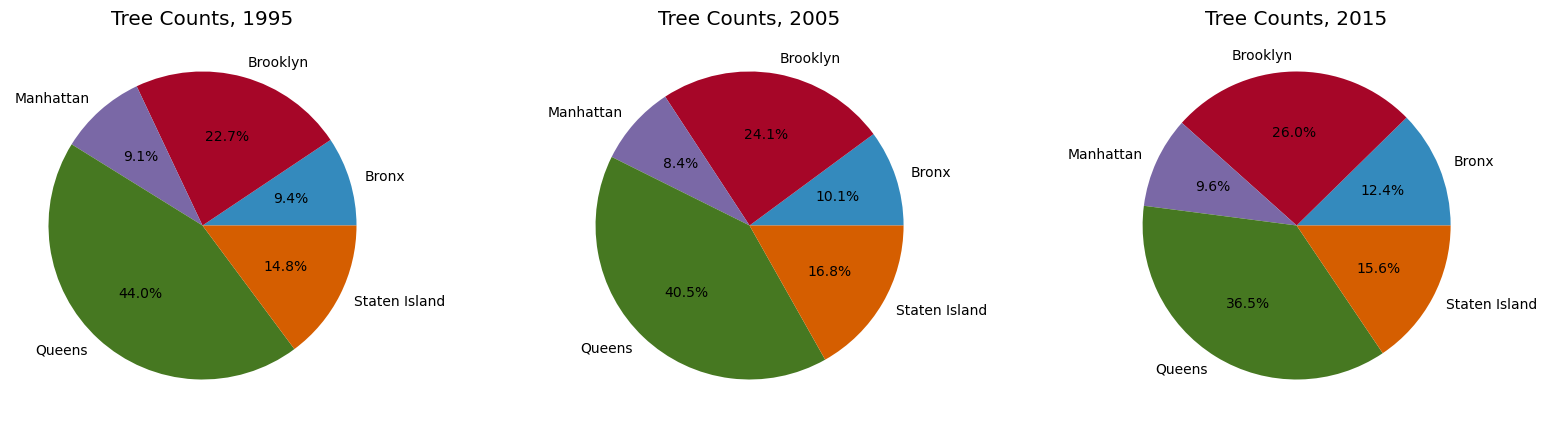

In [24]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))   # set up three axes
plt.style.use('bmh')

ax1.pie(counts_1995,labels=counts_1995.index, autopct='%1.1f%%')                   # 1995 data
ax1.set_title('Tree Counts, 1995')

ax2.pie(counts_2005,labels=counts_2005.index, autopct='%1.1f%%')                 # 2005 data
ax2.set_title('Tree Counts, 2005')

ax3.pie(counts_2015,labels=counts_2015.index, autopct='%1.1f%%')                 # 2015 data
ax3.set_title('Tree Counts, 2015')

plt.savefig(nb_path/ 'images' / 'treecounts_piecharts.png')
plt.show()

### Histograms of Tree DBH (Diameter at Breast Height)

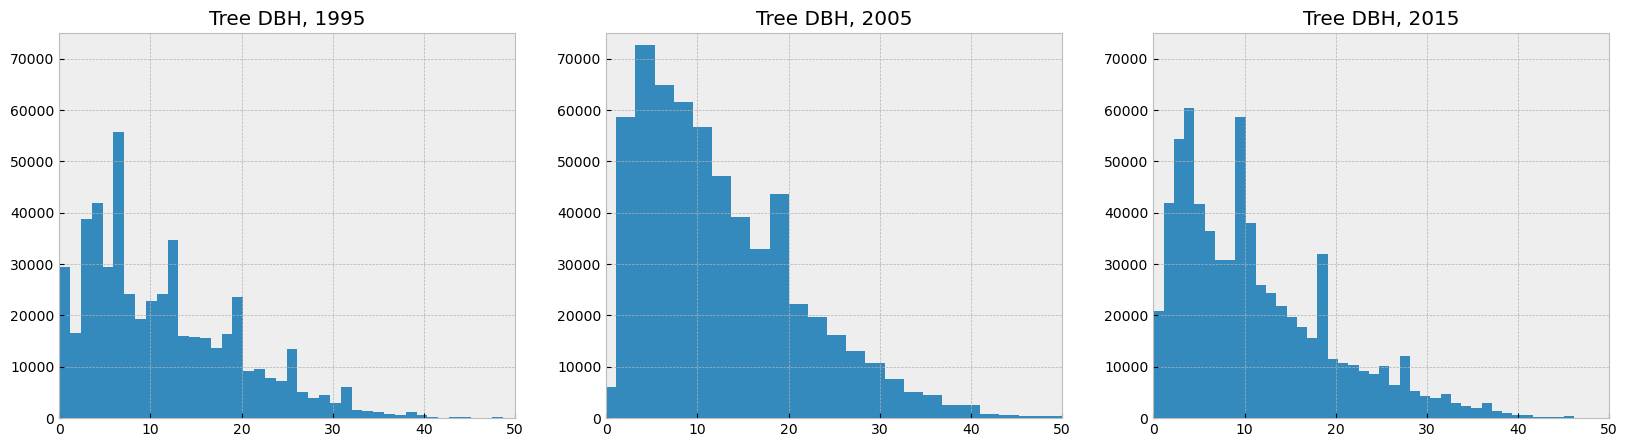

In [25]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))   # set up three axes

ax1.hist(tree_1995['Diameter'],bins=80)  
ax1.set_xlim([0,50])
ax1.set_ylim([0,75000])
ax1.set_title('Tree DBH, 1995')

ax2.hist(tree_2005['tree_dbh'],bins=1000)
ax2.set_xlim([0,50])
ax2.set_ylim([0,75000])
ax2.set_title('Tree DBH, 2005')

ax3.hist(tree_2015['tree_dbh'],bins=400)
ax3.set_xlim([0,50])
ax3.set_ylim([0,75000])
ax3.set_title('Tree DBH, 2015')

plt.savefig(nb_path/ 'images' / 'dbh_histograms.png')
plt.show()

### Combined Bar Chart of total tree counts by borough

In [26]:
total_tree_counts = {'1995':counts_1995,'2005':counts_2005,'2015':counts_2015}   # create dictionary of total counts for each year
total_counts_df = pd.DataFrame(total_tree_counts)                                # create dataframe
total_counts_df                                                                  # view new dataframe

,1995,2005,2015
Bronx,48487,59925,80584
Brooklyn,117101,142852,169744
Manhattan,47215,49886,62428
Queens,227552,240008,237970
Staten Island,76634,99701,101443


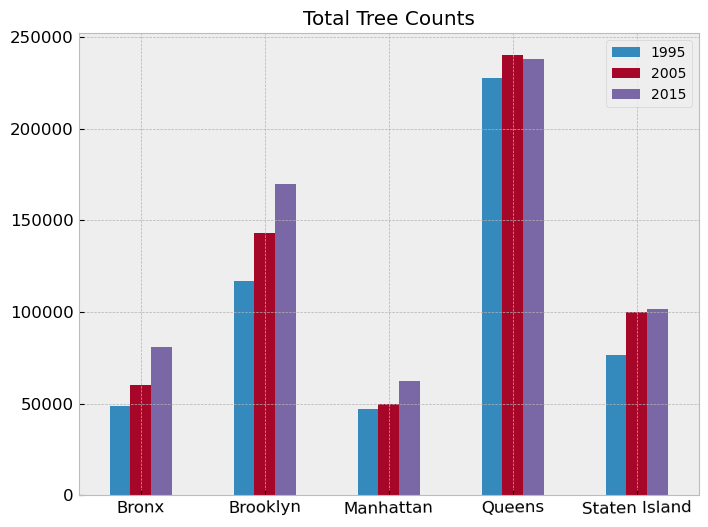

In [27]:
total_counts_df.plot(kind='bar',figsize=(8,6),rot=1,fontsize=12,title='Total Tree Counts')

plt.savefig(nb_path/ 'images' / 'counts_by_boro.png')
plt.show()

### Combined Bar Chart of total tree counts by year

In [28]:
by_year = total_counts_df.T   # swap the dataframe axes
by_year                       # show new dataframe

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
1995,48487,117101,47215,227552,76634
2005,59925,142852,49886,240008,99701
2015,80584,169744,62428,237970,101443


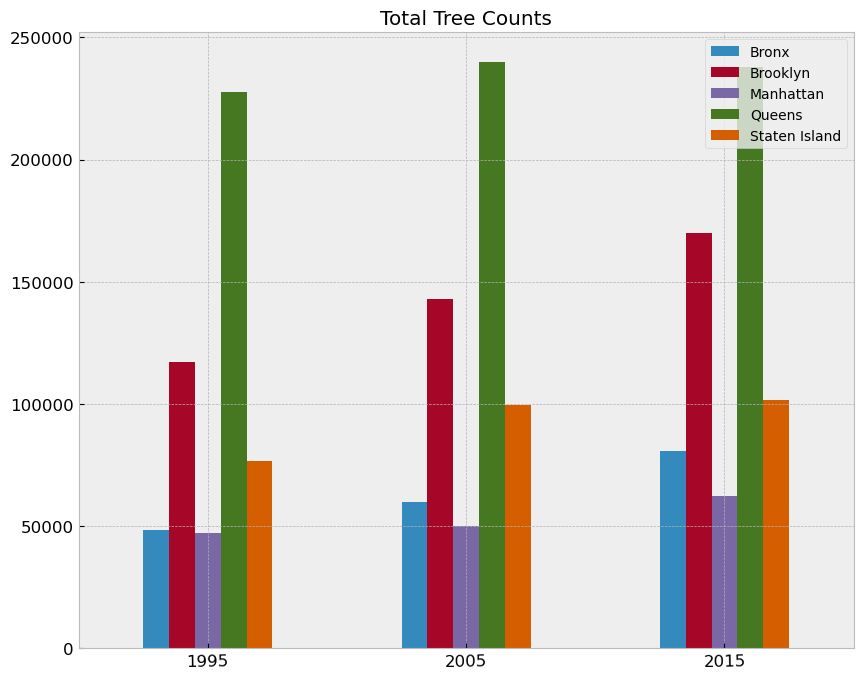

In [29]:
by_year.plot(kind='bar',figsize=(10,8),rot=1,fontsize=12,title='Total Tree Counts')

plt.savefig(nb_path/ 'images' / 'counts_by_year.png')
plt.show()